In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [4]:
heart = pd.read_csv('heart.csv')


In [5]:
heart.dropna(axis = 1, inplace = True)

In [6]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
#defining our feature and target variables
X = heart.drop(['target'], axis = 1)
y = heart['target']

In [8]:
#perform train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [9]:
#perform Logistic Regression ML
from sklearn.linear_model import LogisticRegression

#initiate a Logistic Regression object
clf = LogisticRegression()

#fit the model
clf.fit(X_train, y_train)

#predict the model
y_hat = clf.predict(X_test)
y_hat

/projects/28d9a10c-40d2-4f6c-9dbf-1d4096756733/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1])

In [10]:
from sklearn.metrics import accuracy_score
#calculate accuracy
accuracy_score(y_hat, y_test)

0.824390243902439

In [11]:
from sklearn.metrics import recall_score

recall_score(y_hat, y_test)

0.8252427184466019

In [12]:
from sklearn.metrics import confusion_matrix

px.imshow(confusion_matrix(y_hat, y_test), text_auto = True)

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]} #different options to pass in as parameters
svc = SVC() #setting up machine learning model
clf = GridSearchCV(svc, parameters) #creating gridsearch object
clf.fit(X_train, y_train) #fit model on training data -- will test all parameters and output the most optimal parameters
#print best parameters
print(clf.best_params_)

{'C': 10, 'kernel': 'linear'}


In [14]:
my_svm_model = SVC(kernel = 'linear', C = 1)
my_svm_model.fit(X_train, y_train)
y_hat = my_svm_model.predict(X_test)
y_hat

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1])

In [15]:
accuracy_score(y_hat, y_test)

0.8390243902439024

In [16]:
from sklearn.neighbors import KNeighborsClassifier as KNN
parameters = {'n_neighbors': [1, 11, 13, 15]}
my_knn_model = KNN()
clf = GridSearchCV(my_knn_model, parameters)
clf.fit(X_train, y_train)
print(clf.best_params_)

{'n_neighbors': 1}


In [17]:
from sklearn.metrics import accuracy_score
accuracies = []
for i in range(1,15):
    my_knn_model = KNN(n_neighbors = i)
    my_knn_model.fit(X_train, y_train)
    y_pred = my_knn_model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(accuracy)
    accuracies.append(accuracy)

0.9853658536585366
0.9560975609756097
0.9365853658536586
0.8048780487804879
0.751219512195122
0.7658536585365854
0.7219512195121951
0.7365853658536585
0.7317073170731707
0.7268292682926829
0.7121951219512195
0.7219512195121951
0.7317073170731707
0.7463414634146341


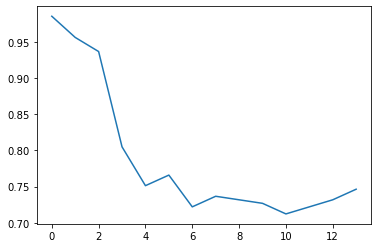

In [18]:
plt.plot(accuracies)

In [19]:
#Max -- KNN

import sklearn
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
print(X_train.shape)
print(y_train.shape)

(820, 13)
(820,)


In [21]:
k = 7
my_KNN_model = KNN(n_neighbors=k)

In [22]:
my_KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [23]:
y_hat = my_KNN_model.predict(X_test)

In [24]:
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1])

In [25]:
np.array(y_test)

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1])

In [26]:
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)

0.2780487804878049


In [27]:
accuracy_score(y_hat, y_test)

0.7219512195121951

In [28]:
#Ava -- Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [29]:
x = heart.drop(['target'], axis = 1)
y = heart['target']

In [30]:
import sklearn
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7)

In [31]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [32]:
y_hat = clf.predict(x_test)
y_hat

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,

In [33]:
from sklearn.metrics import accuracy_score
#find accuracy
accuracy_score(y_hat, y_test)

0.9623955431754875

In [34]:
from sklearn.metrics import classification_report
# find classification
classification_report(y_hat, y_test)

'              precision    recall  f1-score   support\n\n           0       0.95      0.97      0.96       344\n           1       0.98      0.95      0.96       374\n\n    accuracy                           0.96       718\n   macro avg       0.96      0.96      0.96       718\nweighted avg       0.96      0.96      0.96       718\n'

In [35]:
from sklearn.metrics import recall_score

recall_score(y_hat, y_test)

0.9518716577540107

<AxesSubplot:>

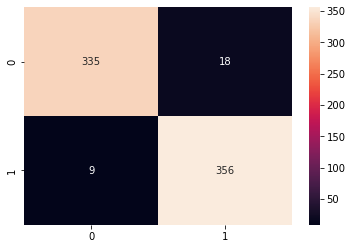

In [36]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

In [37]:
print(classification_report(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       344
           1       0.98      0.95      0.96       374

    accuracy                           0.96       718
   macro avg       0.96      0.96      0.96       718
weighted avg       0.96      0.96      0.96       718



In [38]:
#Rocco -- LR
X = heart.drop(['target', 'exang', 'oldpeak', 'slope'], axis = 1)
y = heart['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.95)

In [40]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
y_hat




/projects/28d9a10c-40d2-4f6c-9dbf-1d4096756733/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0])

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_hat, y_test)

0.7884615384615384

In [42]:
from sklearn.metrics import recall_score
recall_score(y_hat, y_test)


0.75

In [43]:
from sklearn.metrics import classification_report



In [44]:
print(classification_report(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78        24
           1       0.84      0.75      0.79        28

    accuracy                           0.79        52
   macro avg       0.79      0.79      0.79        52
weighted avg       0.79      0.79      0.79        52

